## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Importing Dataset

In [3]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\student_habits_performance.csv")

# Project Name: 
## **Student's Habits,Mental Health And Performance Analysis**

In [4]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
df.shape

(1000, 16)

## Data Handling & Cleaning

In [7]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
df.dropna(subset=["parental_education_level"],inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# Removing Column For Better Readablity
df.drop(columns=["student_id","internet_quality"],inplace=True)

## EDA & Visualization 

In [11]:
df.rename(columns={"netflix_hours":"content_watching_hours"},inplace=True) # Renaming Column 

In [12]:
df["sleep_hours"].max()

np.float64(10.0)

### `Average Age & Mental Health Score Based on Gender`

In [13]:
classifi_ment=df.groupby("gender").agg({
    "age":"mean",
    "mental_health_rating":"mean"
}).reset_index().style.background_gradient(cmap="Reds")

classifi_ment

,gender,age,mental_health_rating
0,Female,20.390300,5.528868
1,Male,20.538636,5.404545
2,Other,20.722222,5.472222


### `How Sleep Quality & Exercise Frequency Can Affect Mental Health And Exam Score`

In [14]:
classifi_sl=df.groupby("gender").agg({
    "sleep_hours":"mean",
    "mental_health_rating":"mean",
    "exercise_frequency":"sum",
    "exam_score":"sum"
}).reset_index().style.background_gradient(cmap="Spectral")

classifi_sl

,gender,sleep_hours,mental_health_rating,exercise_frequency,exam_score
0,Female,6.489838,5.528868,1260,30300.700000
1,Male,6.435227,5.404545,1404,30346.900000
2,Other,6.758333,5.472222,110,2580.800000


### *<p style="color:Orange;">Our main focus is to follow the exam score and how sleep quality and exercise frquency can affect it, And as we can see the sleep quality and mental health is comparetively better in Other category in gender column but exam score is lower cause the exercise frequency is really low, so in conclusion sleep quality is imporant for productivity and academic excellence purpose but exercise frequency is also the most prominent and important factor when it comes to academic rank and score, so the data shows that the Males are comparetively frequent in exercise so they are more prone to get a good marks on their exam</p>*


### `How Digital Screen Time Affect Mental Health Base On Gender`

In [15]:
classifi_so=df.groupby("gender").agg({
    "age":"mean",
    "social_media_hours":"mean",
    "content_watching_hours":"mean",
    "mental_health_rating":"mean"
}).reset_index().style.background_gradient(cmap="YlGnBu")

classifi_so

,gender,age,social_media_hours,content_watching_hours,mental_health_rating
0,Female,20.390300,2.505543,1.807159,5.528868
1,Male,20.538636,2.492273,1.834091,5.404545
2,Other,20.722222,2.644444,2.063889,5.472222


In [16]:
df["part-time_job"]=df.replace({"No":0,"Yes":1},inplace=True) #Replacing value with 0 & 1 for better understanding

C:\Users\user\AppData\Local\Temp\ipykernel_23596\880970808.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["part-time_job"]=df.replace({"No":0,"Yes":1},inplace=True) #Replacing value with 0 & 1 for better understanding


### `Classification Based On Study,Attendance & Exam Score`

In [17]:
classifi_st=df.groupby("gender").agg({
    "study_hours_per_day":["mean","sum"],
    "attendance_percentage":"mean",
    "exam_score":"sum"
}).reset_index().style.background_gradient(cmap="Oranges")
classifi_st

### `Curiosity And Eagerness Of Students With Mental Health Classification`

In [18]:
classifi_cu=df.groupby(["gender","parental_education_level","part_time_job","extracurricular_participation"]).agg({
    "age":"mean",
    "attendance_percentage":"mean",
    "mental_health_rating":"mean"
}).reset_index().sort_values("mental_health_rating",ascending=False).style.background_gradient(cmap="Blues")
classifi_cu

,gender,parental_education_level,part_time_job,extracurricular_participation,age,attendance_percentage,mental_health_rating
25,Other,Bachelor,0,1,19.000000,78.500000,10.000000
32,Other,Master,0,1,23.000000,100.000000,8.000000
30,Other,High School,1,1,20.500000,94.500000,8.000000
6,Female,High School,1,0,20.291667,82.658333,6.958333
31,Other,Master,0,0,22.000000,87.320000,6.600000
9,Female,Master,0,1,19.900000,82.600000,6.250000
2,Female,Bachelor,1,0,20.520000,84.776000,6.200000
28,Other,High School,0,1,22.500000,78.316667,6.000000
0,Female,Bachelor,0,0,20.484211,86.155789,5.873684
18,Male,High School,1,0,20.289474,81.752632,5.842105


### `Health & Diet Classification`

In [19]:
classifi_diet=df.groupby(["gender","diet_quality"])["exercise_frequency"].mean().reset_index()
classifi_diet.style.background_gradient(cmap="Greens")

,gender,diet_quality,exercise_frequency
0,Female,Fair,2.989529
1,Female,Good,2.828221
2,Female,Poor,2.886076
3,Male,Fair,2.984127
4,Male,Good,3.374269
5,Male,Poor,3.287500
6,Other,Fair,2.437500
7,Other,Good,3.230769
8,Other,Poor,4.142857


## Visualizations

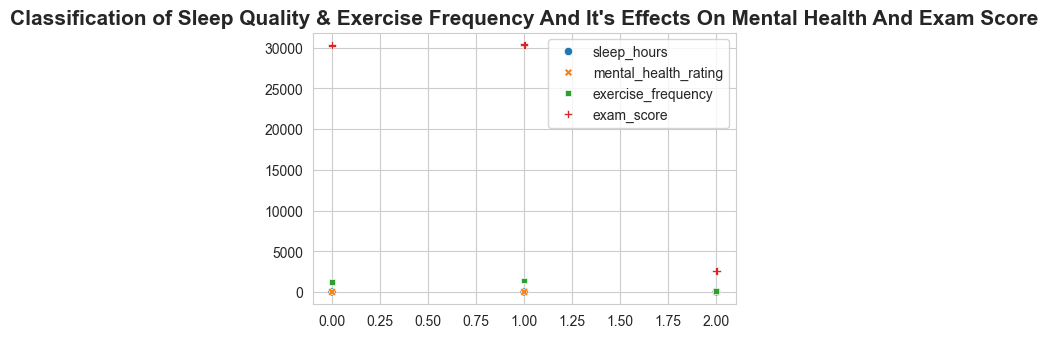

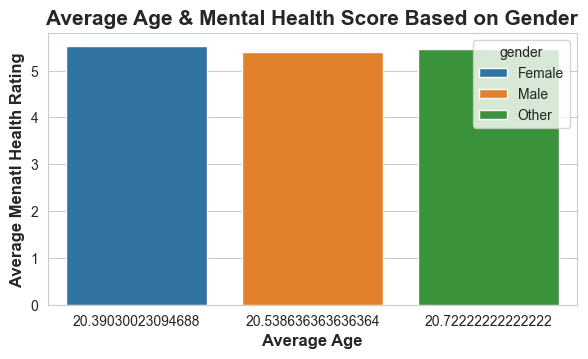

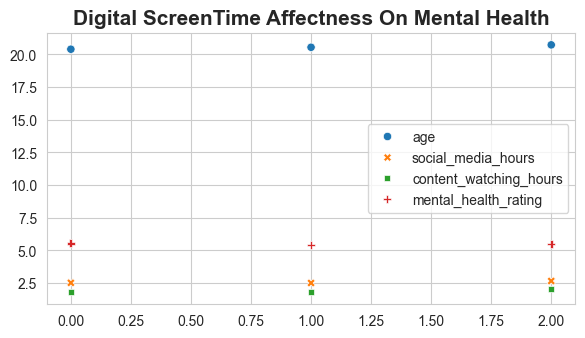

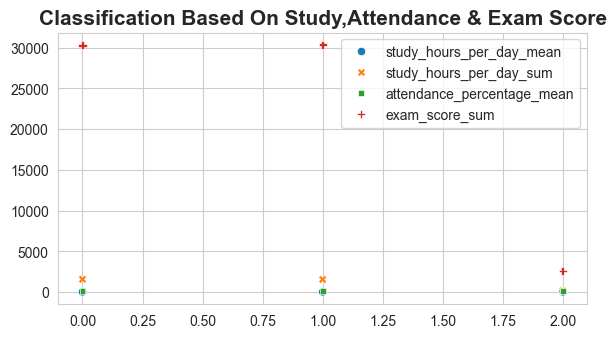

<Axes: >

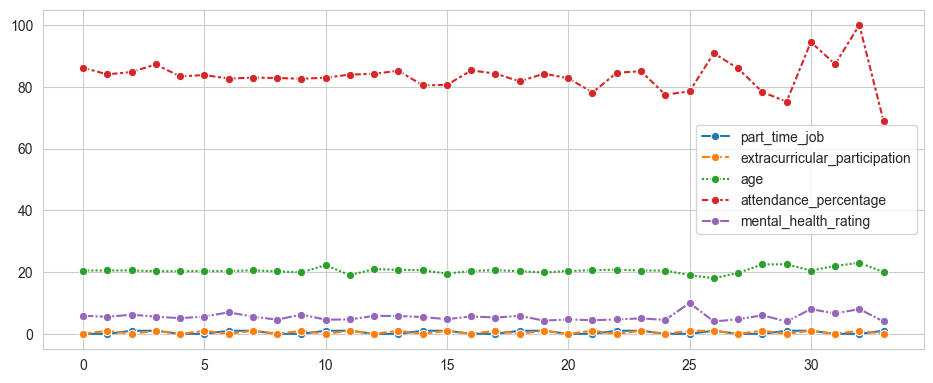

In [20]:
classifi_sl=df.groupby("gender").agg({
    "sleep_hours":"mean",
    "mental_health_rating":"mean",
    "exercise_frequency":"sum",
    "exam_score":"sum"
}).reset_index()
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.subplot(3, 2, 1)
sns.scatterplot(data=classifi_sl)
plt.title("Classification of Sleep Quality & Exercise Frequency And It's Effects On Mental Health And Exam Score",fontweight="bold",fontsize=15)


classifi_ment=df.groupby("gender").agg({
    "age":"mean",
    "mental_health_rating":"mean"
}).reset_index()
plt.figure(figsize=(15,12))
sns.set_style("whitegrid")
plt.subplot(3, 2, 2)
sns.barplot(data=classifi_ment,x="age",y="mental_health_rating",hue="gender")
plt.title("Average Age & Mental Health Score Based on Gender",fontweight="bold",fontsize=15)
plt.xlabel("Average Age",fontweight="bold",fontsize=12)
plt.ylabel("Average Menatl Health Rating",fontweight="bold",fontsize=12)


classifi_so=df.groupby("gender").agg({
    "age":"mean",
    "social_media_hours":"mean",
    "content_watching_hours":"mean",
    "mental_health_rating":"mean"
}).reset_index()
plt.figure(figsize=(15,12))
sns.set_style("whitegrid")
plt.subplot(3, 2, 3)
sns.scatterplot(data=classifi_so)
plt.title("Digital ScreenTime Affectness On Mental Health",fontweight="bold",fontsize=15)


classifi_st=df.groupby("gender").agg({
    "study_hours_per_day":["mean","sum"],
    "attendance_percentage":"mean",
    "exam_score":"sum"
}).reset_index()
classifi_st.columns = ['_'.join(col).strip('_') for col in classifi_st.columns.values]
plt.figure(figsize=(15,12))
sns.set_style("whitegrid")
plt.subplot(3, 2, 4)
sns.scatterplot(data=classifi_st)
plt.title("Classification Based On Study,Attendance & Exam Score",fontweight="bold",fontsize=15)
plt.show()


classifi_cu=df.groupby(["gender","parental_education_level","part_time_job","extracurricular_participation"]).agg({
    "age":"mean",
    "attendance_percentage":"mean",
    "mental_health_rating":"mean"
}).reset_index()
plt.figure(figsize=(25,15))
sns.set_style("whitegrid")
plt.subplot(3, 2, 5)
sns.lineplot(data=classifi_cu,marker="o")

In [ ]:
classifi_diet=df.groupby(["gender","diet_quality"])["exercise_frequency"].mean().reset_index()
classifi_diet
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe_connected'
pio.renderers.default = 'iframe_connected'
fig=px.bar(classifi_diet,x="diet_quality",y="exercise_frequency",color="gender",title="Health & Diet Classification", labels={"diet_quality": "Diet Quality", "exercise_frequency": "Exercise Frequency"})
fig.show()

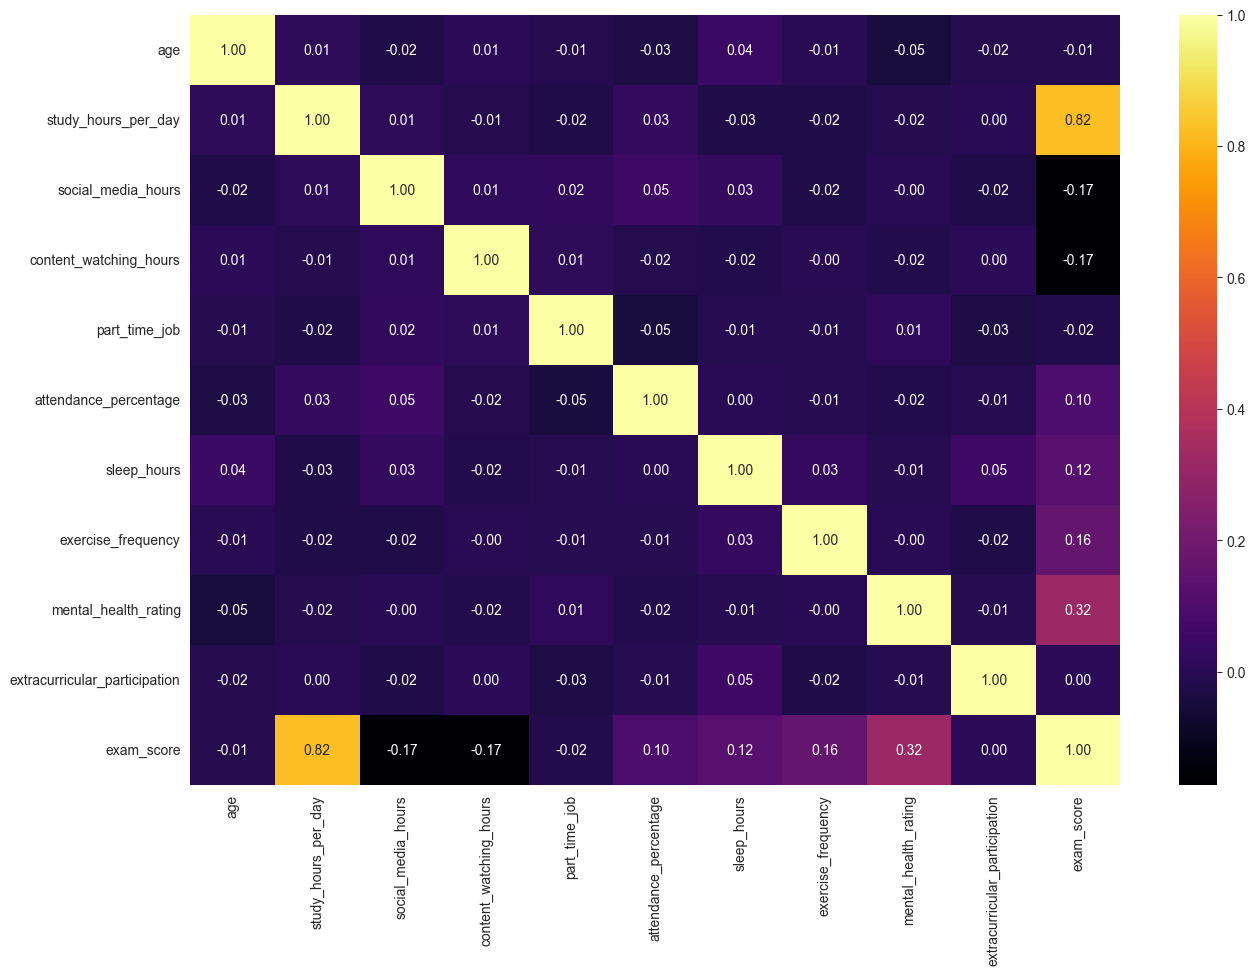

In [22]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="inferno")
plt.show()

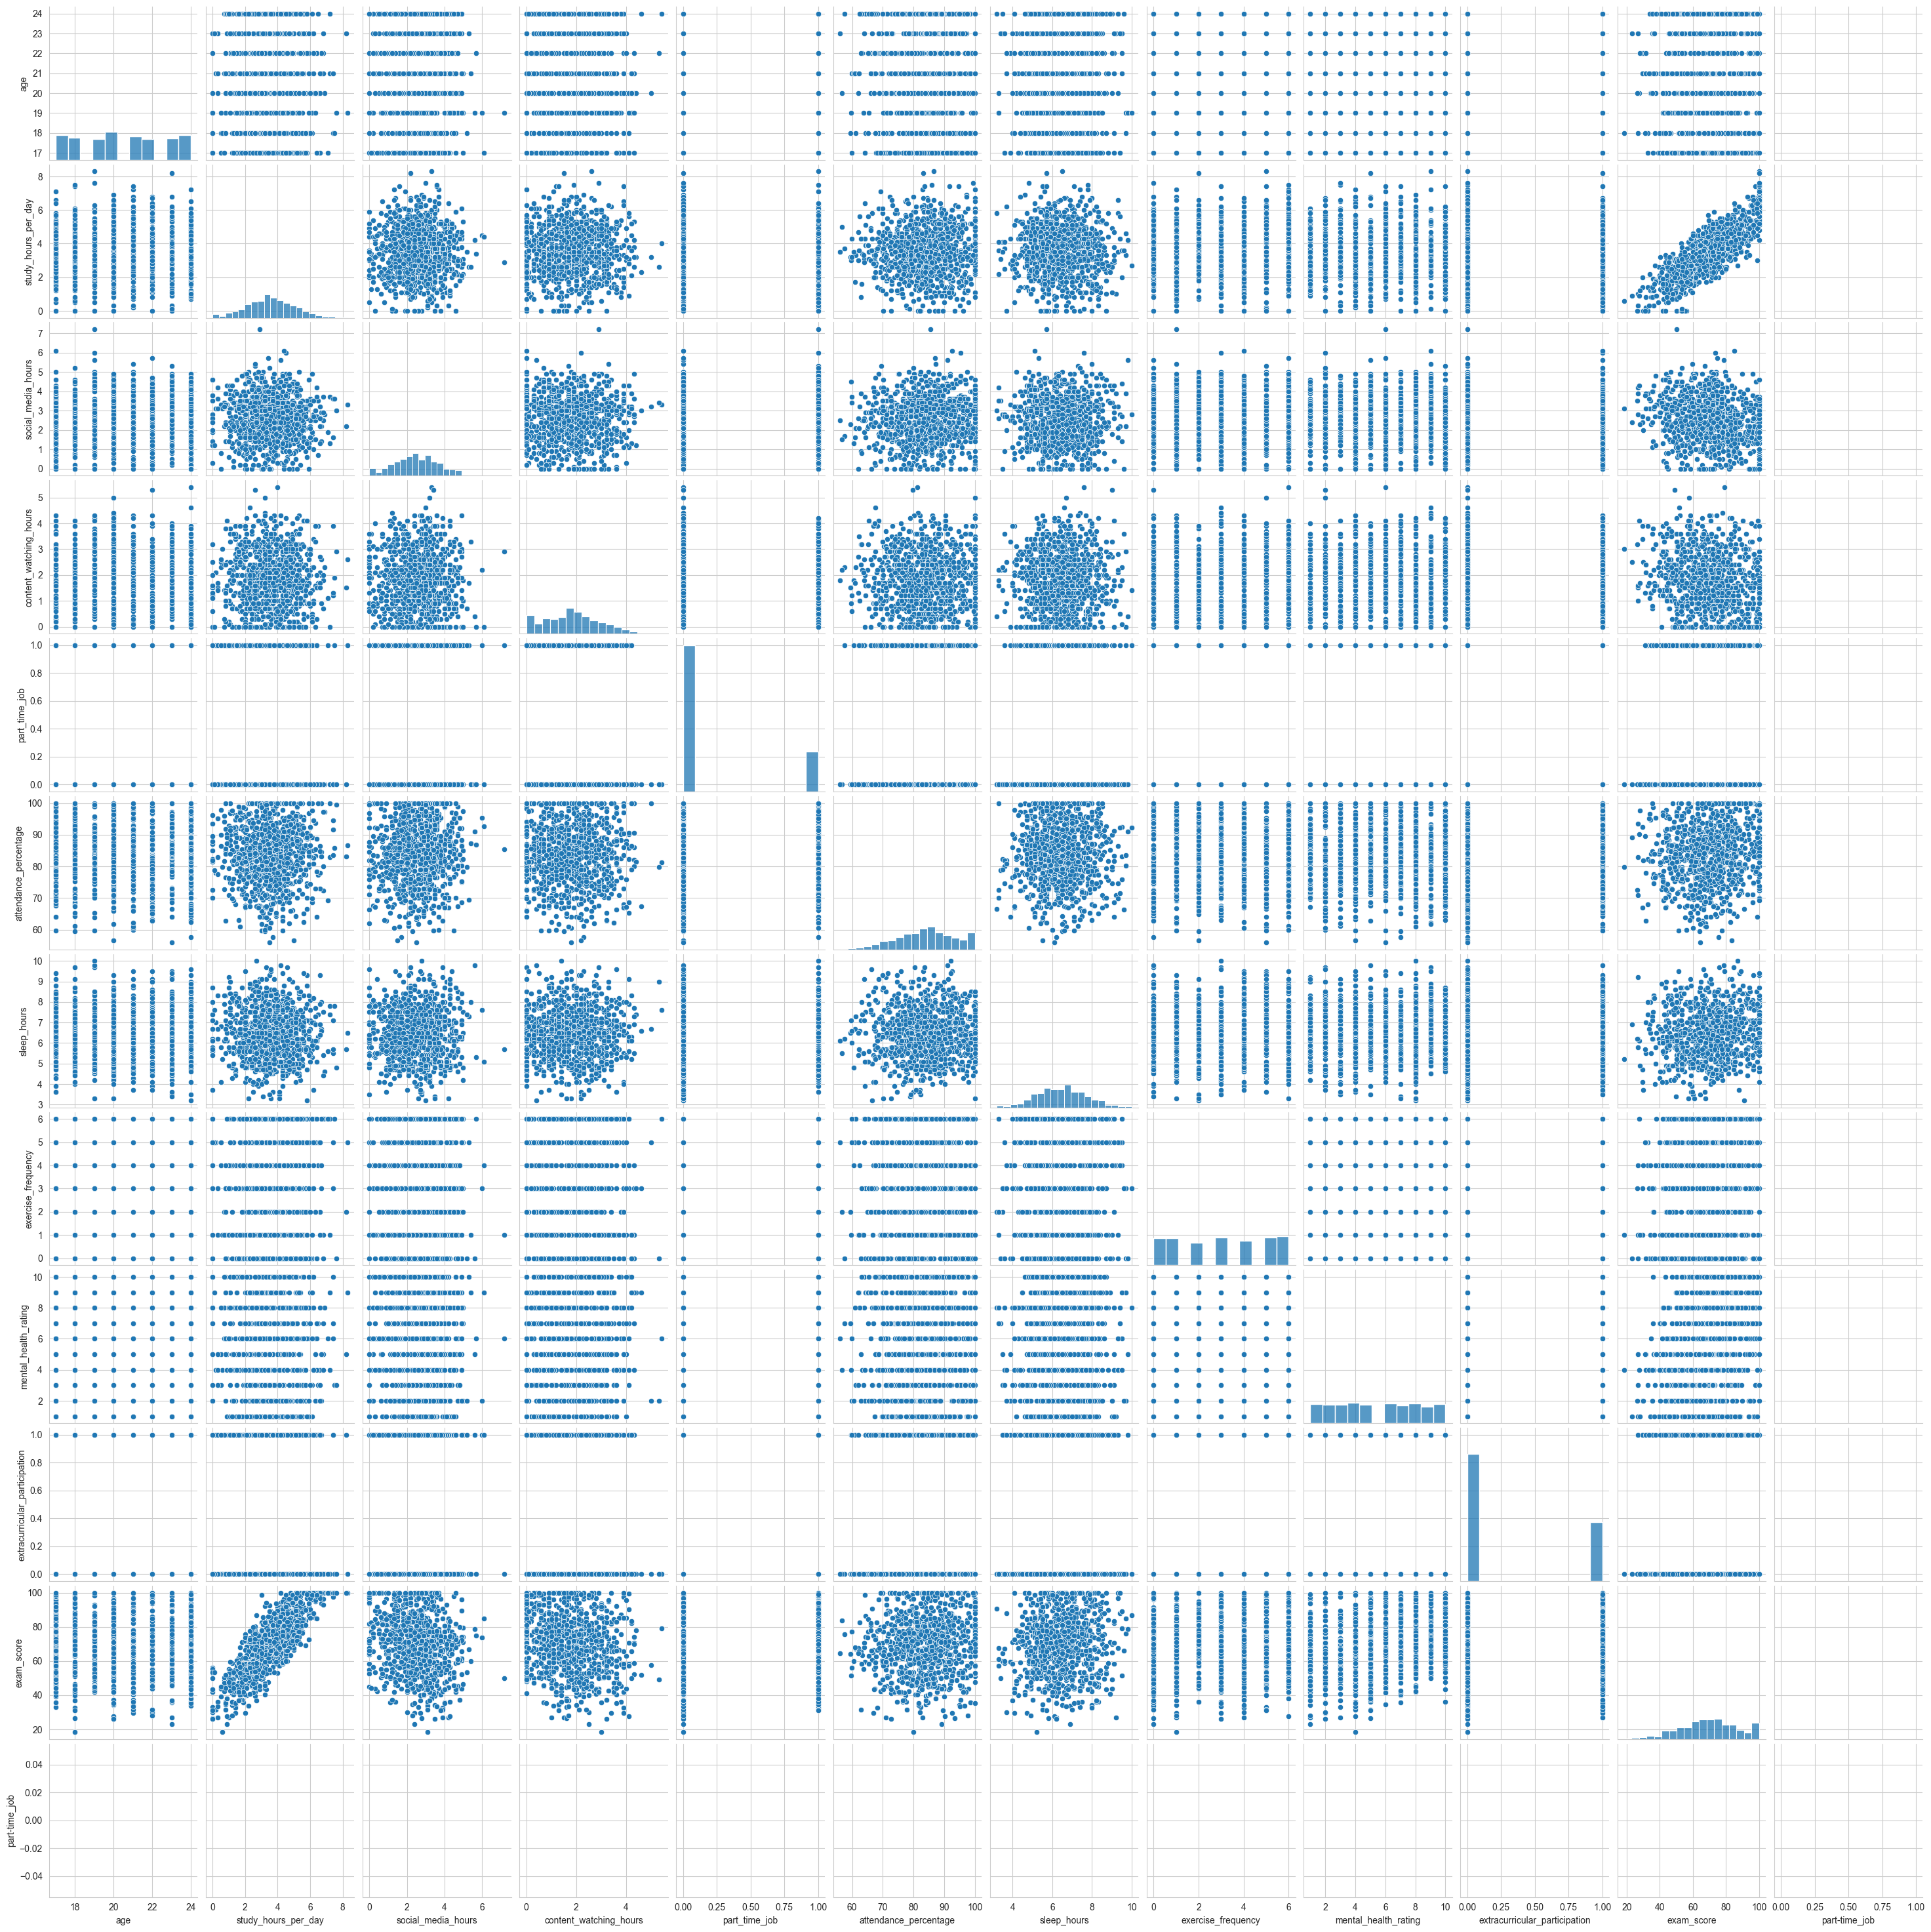

In [23]:
sns.pairplot(df)